In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# pm1 y pm2 en minutos (puede tener decimales)
pm1 = 593
pm2 = 641

In [3]:
the_path = os.getcwd()
data_path = os.path.join(the_path, '../data/processed-data/')
file_name = 'BTC-USDT-processed.csv'
file_path = data_path + file_name
df = pd.read_csv(file_path, index_col='Date')

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,Average
Date,
2018-02-23 06:00:00,10899.9
2018-02-23 06:01:00,10899.9
2018-02-23 06:02:00,10899.9
2018-02-23 06:03:00,10899.9
2018-02-23 06:04:00,10899.9


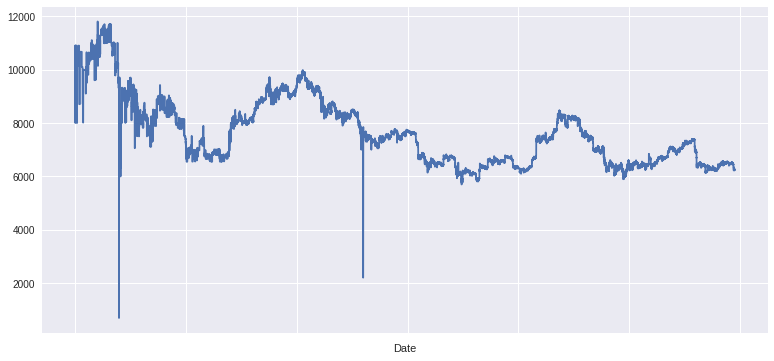

In [5]:
df['Average'].plot(figsize=(13,6))

In [6]:
# getting just last 6 months
df.index = pd.to_datetime(df.index)
df_M = df.last('120H').copy()
df_M.head(5)

,Average
Date,
2018-09-12 23:38:00,6350.9
2018-09-12 23:39:00,6350.9
2018-09-12 23:40:00,6350.9
2018-09-12 23:41:00,6350.9
2018-09-12 23:42:00,6350.9


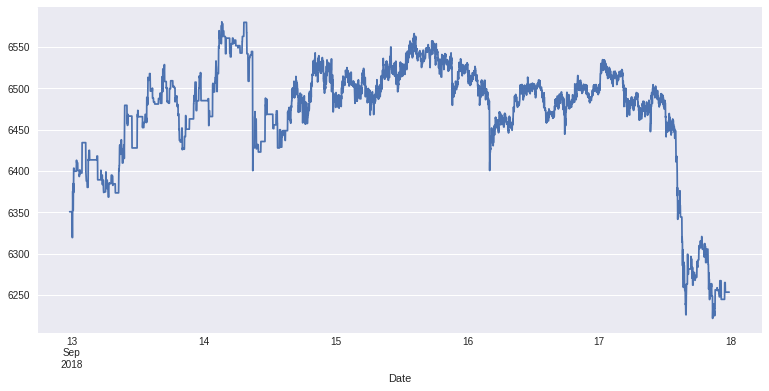

In [7]:
df_M['Average'].plot(figsize=(13,6))

In [8]:
df_M['PM1'] = df_M['Average'].rolling(pm1).mean()
df_M['PM2'] = df_M['Average'].rolling(pm2).mean()
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2
Date,,,
2018-09-13 10:18:00,6466.5,6405.893423,6402.179875
2018-09-13 10:19:00,6466.5,6406.005734,6402.360218
2018-09-13 10:20:00,6466.5,6406.118044,6402.540562
2018-09-13 10:21:00,6466.5,6406.230354,6402.720905
2018-09-13 10:22:00,6466.5,6406.342664,6402.901248


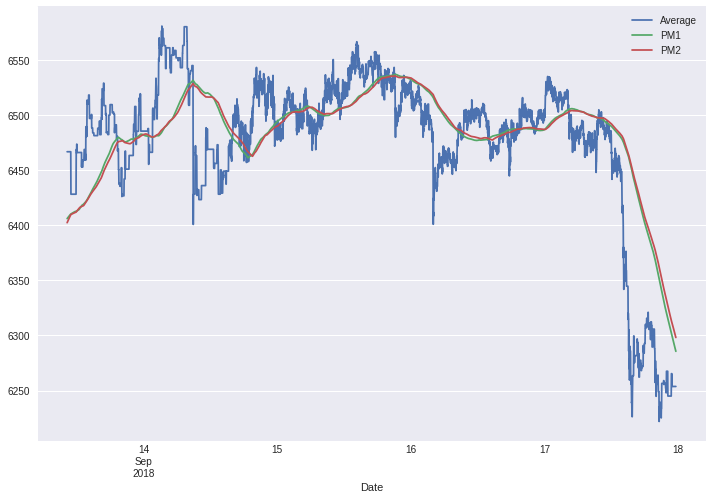

In [9]:
df_M.plot(figsize=(12,8))

In [10]:
df_M['Posicion'] = np.where(df_M['PM1'] > df_M['PM2'], 1, -1)

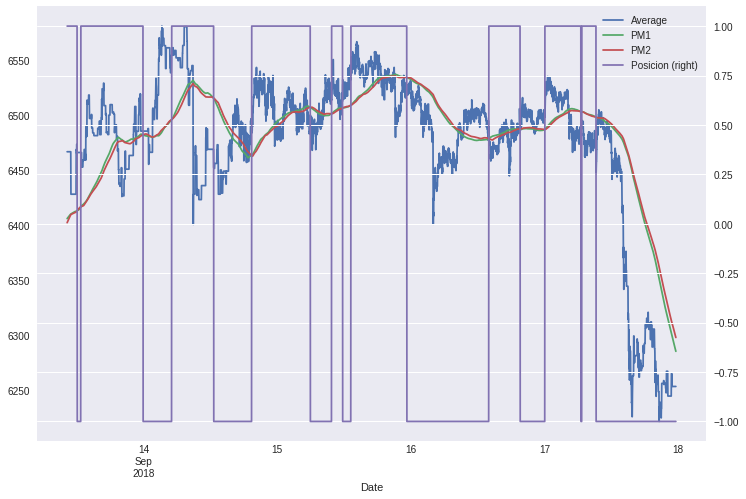

In [11]:
df_M.plot(figsize=(12,8), secondary_y = 'Posicion')

In [12]:
df_M['Retornos'] = np.log(df_M['Average']/df_M['Average'].shift(1))

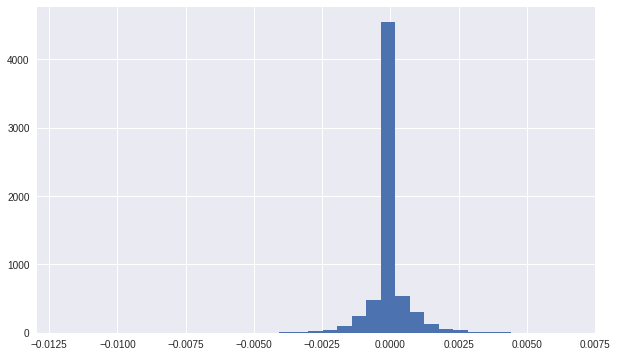

In [13]:
df_M['Retornos'].hist(bins=35, figsize=(10,6));

In [14]:
df_M.dropna(inplace = True)
df_M['Estrategia'] = df_M['Retornos']* df_M['Posicion'].shift(1)
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2,Posicion,Retornos,Estrategia
Date,,,,,,
2018-09-13 10:20:00,6466.5,6406.118044,6402.540562,1,0.0,0.0
2018-09-13 10:21:00,6466.5,6406.230354,6402.720905,1,0.0,0.0
2018-09-13 10:22:00,6466.5,6406.342664,6402.901248,1,0.0,0.0
2018-09-13 10:23:00,6466.5,6406.454975,6403.081591,1,0.0,0.0
2018-09-13 10:24:00,6466.5,6406.567285,6403.261934,1,0.0,0.0


In [15]:
df_M['Retacum'] = df_M['Retornos'].cumsum().apply(np.exp)
df_M['Estracum'] = df_M['Estrategia'].cumsum().apply(np.exp)
df_M.tail()

,Average,PM1,PM2,Posicion,Retornos,Estrategia,Retacum,Estracum
Date,,,,,,,,
2018-09-17 23:33:00,6253.7,6286.847218,6299.323752,-1,0.0,-0.0,0.967092,1.00895
2018-09-17 23:34:00,6253.7,6286.514503,6299.019852,-1,0.0,-0.0,0.967092,1.00895
2018-09-17 23:35:00,6253.7,6286.194224,6298.712051,-1,0.0,-0.0,0.967092,1.00895
2018-09-17 23:36:00,6253.7,6285.879975,6298.396295,-1,0.0,-0.0,0.967092,1.00895
2018-09-17 23:37:00,6253.7,6285.566484,6298.086154,-1,0.0,-0.0,0.967092,1.00895


([], <a list of 0 Text xticklabel objects>)

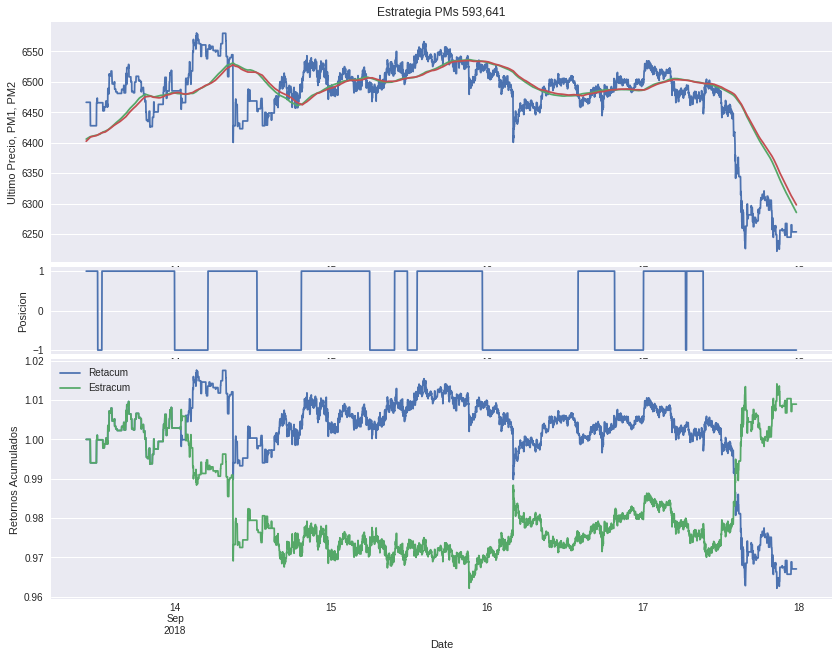

In [16]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((25,1),(0,0),rowspan = 8, colspan = 1)
df_M['Average'].plot(title = ('Estrategia PMs ' + str(pm1) + ',' + str(pm2)))
df_M['PM1'].plot(ax=ax1)
df_M['PM2'].plot(ax=ax1)

ax1.set_ylabel('Ultimo Precio, PM1, PM2')
plt.xticks([],[])

ax2 = plt.subplot2grid((25,1),(8,0), rowspan = 3, colspan = 1)
df_M['Posicion'].plot(ylim=[-1.1,1.1])
ax2.set_ylabel('Posicion')
plt.xticks([],[])

ax3=plt.subplot2grid((25,1),(11,0),rowspan = 8, colspan = 1)
df_M[['Retacum', 'Estracum']].plot(ax = ax3)
ax3.set_ylabel('Retornos Acumulados')
plt.xticks([],[])